In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm,datasets


In [2]:
iris=datasets.load_iris()

In [7]:

df=pd.DataFrame(iris['data'],columns=iris.feature_names)

In [8]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [12]:
df.shape

(150, 5)

In [11]:
df['flower']=iris['target']
df['flower']=df['flower'].apply(lambda x:iris.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),flower
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [32]:
from sklearn.model_selection import train_test_split as tts,cross_val_score as cvs


In [14]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [29]:
xtrain,xtest,ytrain,ytest=tts(X,y,test_size=0.2)

In [30]:
model=svm.SVC(kernel='rbf',gamma='auto',C=0.5)
model.fit(xtrain,ytrain)
model.score(xtest,ytest)

0.9666666666666667

In [35]:
cross=cvs(svm.SVC(kernel='rbf',gamma='auto',C=0.5),X,y,cv=5)

In [42]:
np.average(cross)

0.9800000000000001

In [53]:
crange=np.arange(0.1,20,0.4)
kernel=['rbf','linear']
avg_scores={}
for c in crange:
    for k in kernel:
        cv_score=cvs(svm.SVC(kernel=k,gamma='auto',C=c),X,y,cv=5)
        avg_scores[k+'_'+str(c)]=np.average(cv_score)
print(avg_scores)
#plt.plot(avg_scores[:,0],avg_scores[:,1])

{'rbf_0.1': 0.9466666666666667, 'linear_0.1': 0.9733333333333334, 'rbf_0.5': 0.9800000000000001, 'linear_0.5': 0.9866666666666667, 'rbf_0.9': 0.9800000000000001, 'linear_0.9': 0.9866666666666667, 'rbf_1.3000000000000003': 0.9800000000000001, 'linear_1.3000000000000003': 0.9800000000000001, 'rbf_1.7000000000000002': 0.9866666666666667, 'linear_1.7000000000000002': 0.9800000000000001, 'rbf_2.1': 0.9800000000000001, 'linear_2.1': 0.9800000000000001, 'rbf_2.5000000000000004': 0.9800000000000001, 'linear_2.5000000000000004': 0.9800000000000001, 'rbf_2.9000000000000004': 0.9733333333333334, 'linear_2.9000000000000004': 0.9733333333333334, 'rbf_3.3000000000000003': 0.9866666666666667, 'linear_3.3000000000000003': 0.9733333333333334, 'rbf_3.7': 0.9866666666666667, 'linear_3.7': 0.9733333333333334, 'rbf_4.1': 0.9800000000000001, 'linear_4.1': 0.9733333333333334, 'rbf_4.5': 0.9800000000000001, 'linear_4.5': 0.9733333333333334, 'rbf_4.9': 0.9800000000000001, 'linear_4.9': 0.9800000000000001, 'rbf

In [70]:
y1=avg_scores.values()
x1=avg_scores.keys()

In [86]:
len(y1)

100

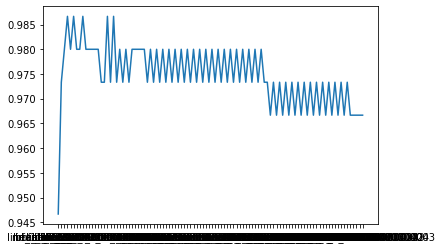

In [87]:
plt.plot(x1,y1)

In [90]:
from sklearn.model_selection import GridSearchCV as gscv


In [91]:
clf=gscv(svm.SVC(gamma='auto'),{
    'C':np.arange(1,20,1),
    'kernel':['rbf','linear']},cv=5,return_train_score=False)


In [92]:
clf.fit(X,y)

GridSearchCV(cv=5, estimator=SVC(gamma='auto'),
             param_grid={'C': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19]),
                         'kernel': ['rbf', 'linear']})

In [94]:
clf.cv_results_

{'mean_fit_time': array([0.00359659, 0.00298519, 0.0031929 , 0.00220232, 0.0024035 ,
        0.00239887, 0.00239224, 0.00219326, 0.00198307, 0.00218801,
        0.00219378, 0.00199075, 0.00200381, 0.00238109, 0.00219254,
        0.00258961, 0.0021945 , 0.00199423, 0.0023932 , 0.00199819,
        0.00258584, 0.00258474, 0.00239325, 0.00218883, 0.00199089,
        0.00239744, 0.00299668, 0.00218778, 0.0019958 , 0.00219402,
        0.00279393, 0.00517464, 0.00359898, 0.0043859 , 0.00457616,
        0.00397305, 0.0045845 , 0.00397906]),
 'std_fit_time': array([7.92497438e-04, 8.98540994e-04, 1.15485562e-03, 3.95472204e-04,
        4.88692163e-04, 4.92944988e-04, 4.88948422e-04, 3.96713396e-04,
        1.77519244e-05, 3.85745152e-04, 3.98352787e-04, 4.49442736e-06,
        1.35949610e-05, 4.85418189e-04, 3.97677656e-04, 4.86932686e-04,
        3.97639896e-04, 2.16738094e-06, 4.86717696e-04, 4.02355635e-06,
        4.84186480e-04, 4.95556820e-04, 4.89299451e-04, 3.89981631e-04,
        5.905

In [96]:
df2=pd.DataFrame(clf.cv_results_)

In [98]:
df2[df2['mean_test_score']>0.979]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003597,0.000792,0.002195,0.000399,1,rbf,"{'C': 1, 'kernel': 'rbf'}",0.966667,1.0,0.966667,0.966667,1.0,0.980000,0.016330,2
1,0.002985,0.000899,0.002406,0.000792,1,linear,"{'C': 1, 'kernel': 'linear'}",0.966667,1.0,0.966667,0.966667,1.0,0.980000,0.016330,2
2,0.003193,0.001155,0.002194,0.000977,2,rbf,"{'C': 2, 'kernel': 'rbf'}",0.966667,1.0,0.966667,0.966667,1.0,0.980000,0.016330,2
3,0.002202,0.000395,0.001194,0.000397,2,linear,"{'C': 2, 'kernel': 'linear'}",0.966667,1.0,0.966667,0.966667,1.0,0.980000,0.016330,2
6,0.002392,0.000489,0.001199,0.000398,4,rbf,"{'C': 4, 'kernel': 'rbf'}",0.966667,1.0,1.000000,0.966667,1.0,0.986667,0.016330,1
8,0.001983,0.000018,0.001606,0.000500,5,rbf,"{'C': 5, 'kernel': 'rbf'}",0.966667,1.0,0.966667,0.966667,1.0,0.980000,0.016330,2
9,0.002188,0.000386,0.001601,0.000481,5,linear,"{'C': 5, 'kernel': 'linear'}",1.000000,1.0,0.933333,0.966667,1.0,0.980000,0.026667,2
10,0.002194,0.000398,0.001795,0.000397,6,rbf,"{'C': 6, 'kernel': 'rbf'}",0.966667,1.0,0.966667,0.966667,1.0,0.980000,0.016330,2
12,0.002004,0.000014,0.001388,0.000484,7,rbf,"{'C': 7, 'kernel': 'rbf'}",0.966667,1.0,0.966667,0.966667,1.0,0.980000,0.016330,2
14,0.002193,0.000398,0.001596,0.000489,8,rbf,"{'C': 8, 'kernel': 'rbf'}",0.966667,1.0,0.966667,0.966667,1.0,0.980000,0.016330,2


In [99]:
clf.best_score_

0.9866666666666667

In [100]:
clf.best_params_

{'C': 4, 'kernel': 'rbf'}